<font size=6 color=darkred> DATA SCIENCE PROJECT

-------------------------

TechNest Task 3

<font color=salmon>E-Commerce Shiipping data

--------------------------
------------------------

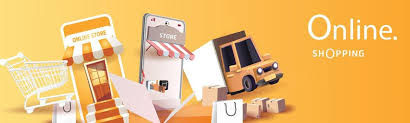

<font size=4 color=teal>About Dataset

<font size=4 color=darkcyan>Context

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

<font size=4 color=darkcyan>Content

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


><font size=4 color=darkcyan> Problem Statement

In e-commerce, timely delivery is critical for customer satisfaction and business success. This project aims to predict whether a shipment will reach on time (target: Reached.on.Time_Y.N, where 1 = not on time, 0 = on time) based on features like warehouse block, shipment mode, customer care calls, product cost, and more. The goal is to build a machine learning model for this binary classification task and deploy it as a web API for real-time predictions.

> <font size=4 color=darkcyan>Solution Pipeline:

Data Collection: Load the e-commerce shipping dataset.
Data Exploration: Analyze distributions, correlations, and data quality.
Data Preprocessing: Handle categorical variables, scaling, and train-test split.
Model Building: Train and tune a Random Forest classifier (chosen for its interpretability and performance on mixed data).
Model Evaluation: Assess accuracy, precision, recall, and other metrics.
Deployment: Create a FastAPI web app to serve predictions via an API endpoint.


> <font size=5 color=orange> Import Libraries

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from flask import Flask, request, jsonify
import warnings
warnings.filterwarnings('ignore')

> <font size=5 color=orange> Data Overview and Initial Exploration

In [10]:
# import dataset
df = pd.read_csv('/content/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
# Summary statistics for numerical columns
print("\nNumerical Summary:")
df.describe(include='all')


Numerical Summary:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [12]:
# Display basic info
print(f'The shape of the data : {df.shape}')
print(f'\n The columns of the data :\n  {df.columns}')
print(f'\n The data types of the data :\n  {df.dtypes.T}')
print(f'\n The memory usage of the data :\n  {df.memory_usage().T}')

The shape of the data : (10999, 12)

 The columns of the data :
  Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

 The data types of the data :
  ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

 The memory usage of the data :
  Index                    132
ID                     87992
Warehouse_block        87992
Mode_of_Shipment       87992
Customer_care_calls    87992
Customer_rating        87992
Cost_of_the_Product    87992
Prior_purchases  

In [13]:
print(f'Data Types and Non-Null Counts:')
df.info()

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


> <font size=5 color=orange> Detect and Handle Missing Values

In [14]:
# check for missing values
print(f'Missing values in the data :\n {df.isnull().sum()}')

Missing values in the data :
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


Exploration Insights:

- No missing values (as expected).
- Target is imbalanced (more "not on time" cases).
- Strong correlations: e.g., Discount_offered and Weight_in_gms with target.
- Categorical variables need encoding.

> <font size=5 color=orange> Exploratory Data Analysis (EDA)

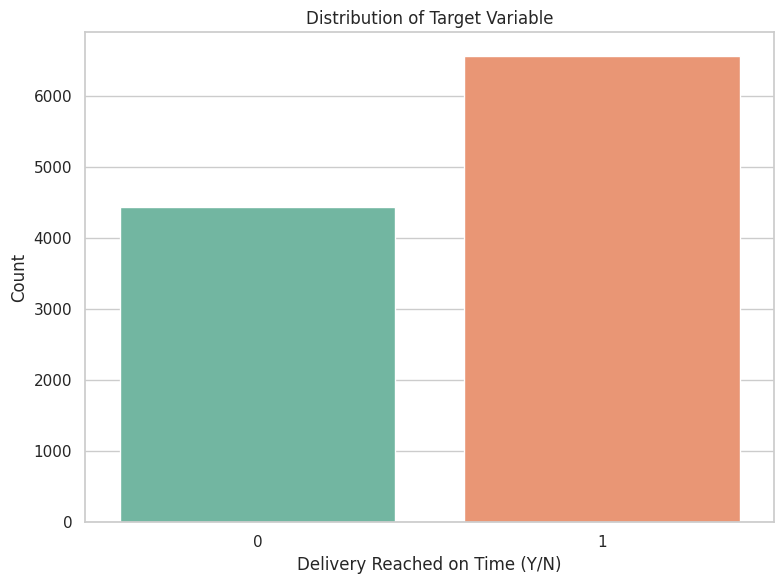

In [15]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Reached.on.Time_Y.N', data=df, palette='Set2')
plt.title('Distribution of Target Variable')
ax.set_xlabel('Delivery Reached on Time (Y/N)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

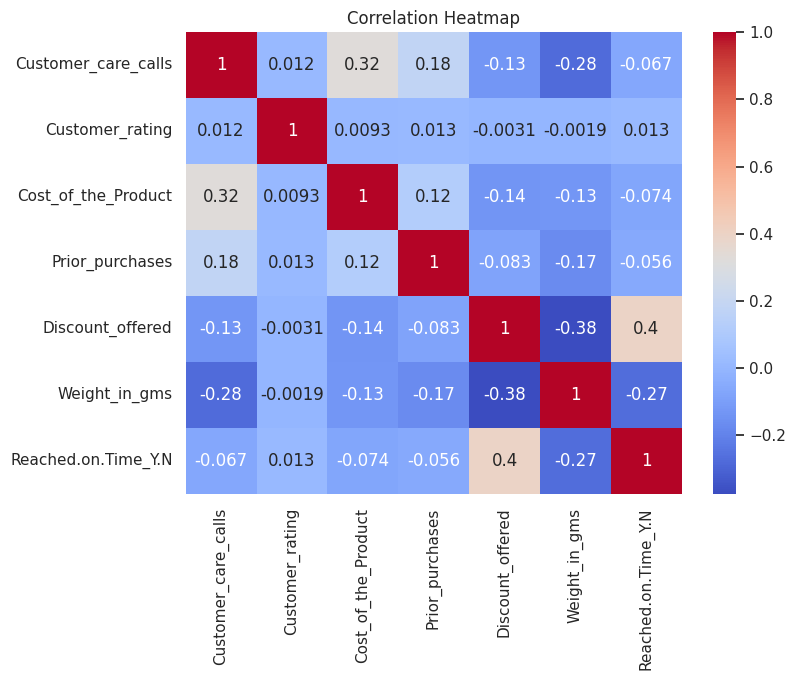

In [16]:
# Correlation heatmap for numerical features
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols + ['Reached.on.Time_Y.N']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

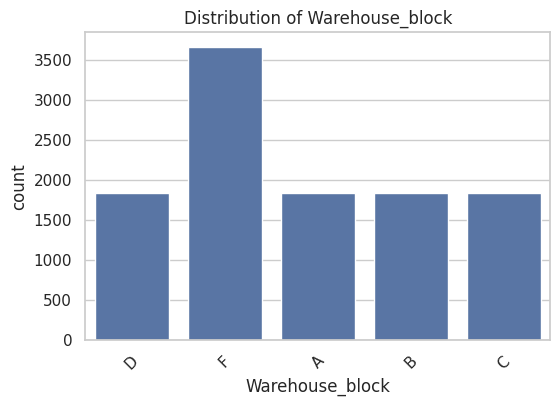

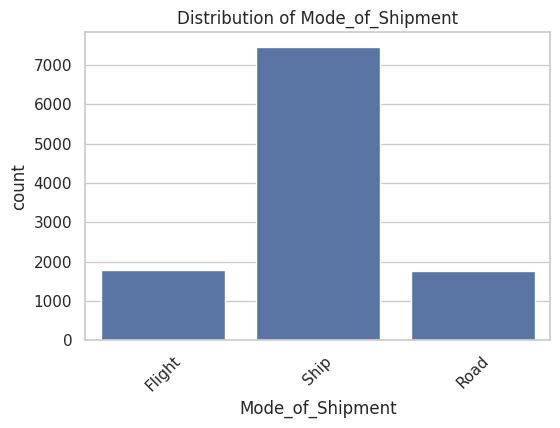

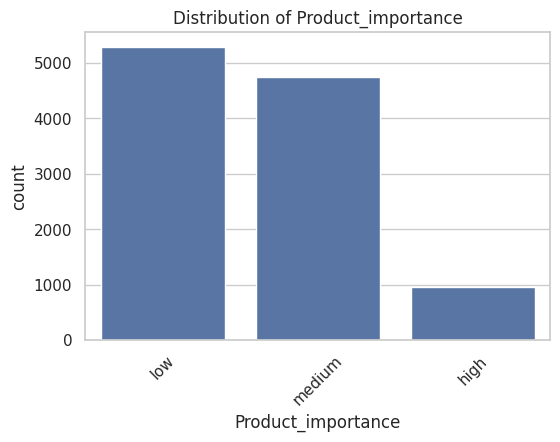

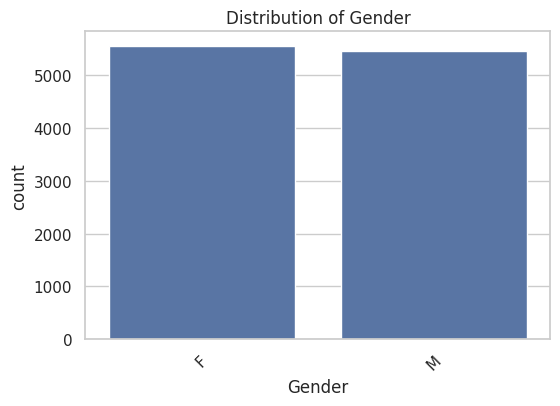

In [17]:
# Categorical Feature distribution
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

><font color=yellowgreen> Data Preprocessing and Feature Engineering

In [18]:
# Drop ID Column (as it's not useful for prediction)
df = df.drop('ID',axis=1)

In [19]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
# Split features and Target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [21]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("Preprocessing Complete. Training set shape:", X_train.shape)

Preprocessing Complete. Training set shape: (8799, 10)


> <font color=yellowgreen> Model Building

In [24]:
# Model 1: Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.635
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.64      0.63      2200



In [25]:
# Model 2: Random Forest with Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6913636363636364
              precision    recall  f1-score   support

           0       0.58      0.89      0.70       895
           1       0.88      0.56      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.69      2200



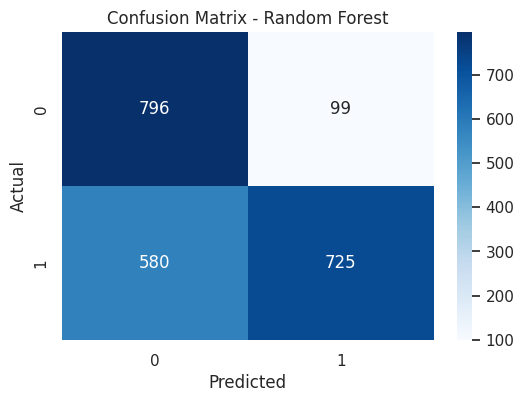

In [27]:
# Confusion Matrix for Best Model (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluation Insights:

- Accuracy ~68% (reasonable for imbalanced data).
- Precision/Recall: Focus on recall for "on time" predictions to minimize delays.


><font color=yellowgreen>Deployment with Flask

In [ ]:
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Expected input: JSON with keys matching features (e.g., {"Warehouse_block": 0, "Mode_of_Shipment": 1, ...})
    input_df = pd.DataFrame([data])
    # Encode categoricals (using same encoder)
    for col in categorical_cols:
        if col in input_df:
            input_df[col] = le.transform(input_df[col])
    # Scale numericals
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    # Predict
    prediction = best_rf.predict(input_df)[0]
    result = "On Time" if prediction == 1 else "Delayed"
    return jsonify({'prediction': result})
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
